# <center>Classification of birds species based on bones using machine learning approach</center>

### &rarr; Data Description
#### Birds dataset have six classes and have various ecological groupings based on their habitats and dietary preferences. In this paper, we will be dealing with 6 ecological bird groups and each bird has been labelled by its ecological group.

- Swimming Birds (labelled as: SW)
- Wading Birds (labelled as: W)
- Terrestrial Birds (labelled as: T)
- Raptors (labelled as: R)
- Scansorial Birds (labelled as: P)
- Singing Birds (labelled as: SO)


#### The dataset we have contains 420 different bird species. For the representation of each bird there are 10 measurements which are listed below.

- Length and Diameter of Humerus
- Length and Diameter of Ulna
- Length and Diameter of Femur
- Length and Diameter of Tibiotarsus
- Length and Diameter of Tarsometatarsus

#### The type of all measurements are continuous float values (mm), and empty strings are used to represent any missing values. This dataset contains bones from the Natural History Museum of Los Angeles County. They are members of 153 genera, 21 orders, and 245 species.


### &rarr; Machine Learning ALgorithms

#### In this project, five different algorithms has been implemented for the classification of birds species. 

- Logistic Regression 
- SVM (Support Vector Machine) 
- KNN (K-Nearest Neighbour)
- Random Forest
- Gradient Boosted Classifier

#### The purpose of using five algorithms is to determine which algorithm yields the best results.

## Following are the required python libraries or packages for the classification

In [2]:
################ Exploratory Data Analysis and Pre-processing #################

import pandas as pd # For data manipulation and analysis
import numpy as np # To perform high level mathematical operations
import matplotlib.pyplot as plt # For animated and interactive visualisations
import seaborn as sns # For visualisations of data

# pandas-profiling primary goal is to provide a one-line Exploratory Data Analysis (EDA) experience
# in a consistent and fast solution.
from pandas_profiling import ProfileReport

from imblearn.over_sampling import RandomOverSampler #To generate new samples in the classes which are under-represented.

# The sklearn. preprocessing package provides several common utility functions and transformer classes 
# to change raw feature vectors into a representation that is more suitable for the downstream estimators. 
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1

################ Model Selection and Model Training #################

# Model_selection is a method for setting a blueprint to analyze data and then 
# use it to measure new data
from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets.

from sklearn.linear_model import LogisticRegression # Linear Model
from sklearn.ensemble import RandomForestClassifier # An ensemble tree-based learning algorithm
from sklearn.svm import SVC #Scalable Linear Support Vector Machine for classification

################ Metrics and Scoring #################
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics
from sklearn.metrics import accuracy_score, f1_score # To check accuracy and F1 score of the models
from sklearn.metrics import confusion_matrix, precision_score, recall_score

## Read dataset (in csv format) from the directory

In [3]:
birdsDataset = pd.read_csv('./bird.csv') # Load dataset and assign it to the variable

## Exploratory Data Analysis (EDA)

#### Dataframe info() method gives the precise summary of dataset. 

In [4]:
 birdsDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   humw    419 non-null    float64
 3   ulnal   417 non-null    float64
 4   ulnaw   418 non-null    float64
 5   feml    418 non-null    float64
 6   femw    419 non-null    float64
 7   tibl    418 non-null    float64
 8   tibw    419 non-null    float64
 9   tarl    419 non-null    float64
 10  tarw    419 non-null    float64
 11  type    420 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


#### From above we can see, there is a list of columns of the dataset, with their number of occurrences and data types. All the variables are numeric other than the type which is an object

 --------------------------------------------------------------------------------------------------------

#### The DataFrame's data are described by the describe() method. The currrent dataFrame contains numerical data, so the description contains following information for each column
- count
- mean
- std (standard deviation)
- min
- max
- 25%, 50%, 75% percentile*


In [5]:
birdsDataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,420.0,209.500000,121.387808,0.00,104.7500,209.500,314.250,419.00
huml,419.0,64.650501,53.834549,9.85,25.1700,44.180,90.310,420.00
humw,419.0,4.370573,2.854617,1.14,2.1900,3.500,5.810,17.84
ulnal,417.0,69.115372,58.784775,14.09,28.0500,43.710,97.520,422.00
ulnaw,418.0,3.597249,2.186747,1.00,1.8700,2.945,4.770,12.00
feml,418.0,36.872416,19.979082,11.83,21.2975,31.130,47.120,117.07
femw,419.0,3.220883,2.023581,0.93,1.7150,2.520,4.135,11.64
tibl,418.0,64.662823,37.838145,5.50,36.4175,52.120,82.870,240.00
tibw,419.0,3.182339,2.080827,0.87,1.5650,2.490,4.255,11.03
tarl,419.0,39.229976,23.184313,7.77,23.0350,31.740,50.250,175.00


---------------------------------------------------------------------------------------------------------

 #### Dataframe head method is used to check the first five records of the dataset

In [6]:
birdsDataset.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


 --------------------------------------------------------------------------------------------------------

### Check Missing Values in the Dataset 

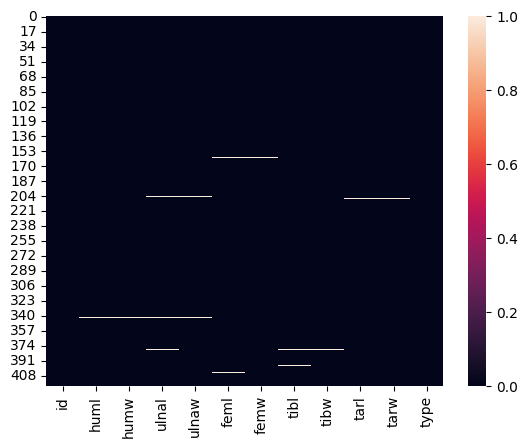

In [7]:
# heatmap() method of seaborn has been used to visualise missing values
sns.heatmap(birdsDataset.isna()); # isna() method to check NaN values in the dataset
plt.show()

#### Vertical axis shows the specific row where there is a missing value. Horizontal axis shows columns having missing values. From above we can see that there are some rows having more than one missing value and some do not have any missing value.

---------------------------------------------------------------------------------------------------------

### Class Distribution

In [8]:
birdsDataset['type'].value_counts() # Count the values of each class in column 'type'

SO    128
SW    116
W      65
R      50
P      38
T      23
Name: type, dtype: int64

#### Above list shows the class imbalance as each class has different number of records

---------------------------------------------------------------------------------------------------------

### Check outliers in the dataset

 #### A data point that is differnet out from the others is called an outlier.

In [9]:
# Below function 'outlier_boxplot' has been defined to plot all the columns/features in the 
# boxplot to check the outliers in the dataset

def outlier_boxplot(columns):
    print(columns) # Print to check number of features coming from declaration of function
    plt.figure(figsize=(12,5));
    plt.subplot(1,2,1); # create a grid of subplots
    sns.boxplot(x='type', y=columns[0], data=birdsDataset);
    plt.title(columns[0]); # Title of the plot 1 (Left side)
    plt.subplot(1,2,2);
    sns.boxplot(x='type', y=columns[1], data=birdsDataset);
    plt.title(columns[1]); # Title of the plot 2 (Right side)


Index(['huml', 'humw'], dtype='object')
Index(['ulnal', 'ulnaw'], dtype='object')
Index(['feml', 'femw'], dtype='object')
Index(['tibl', 'tibw'], dtype='object')
Index(['tarl', 'tarw'], dtype='object')


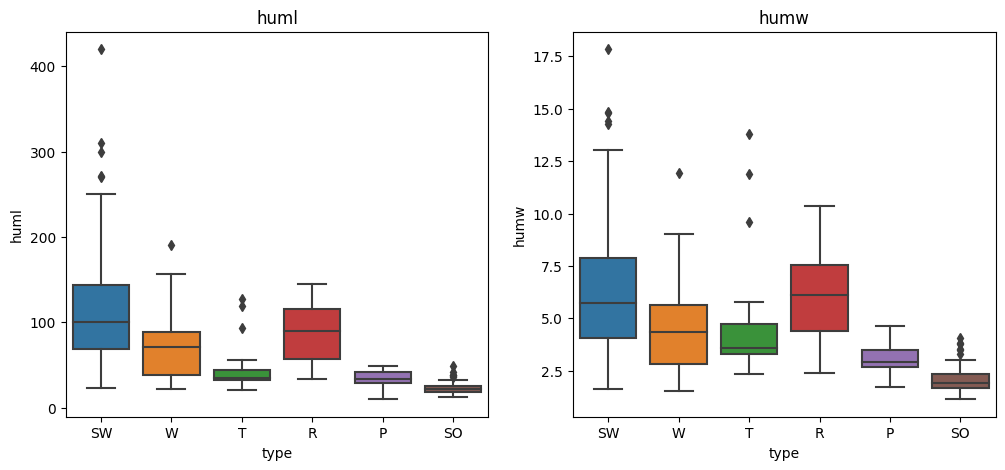

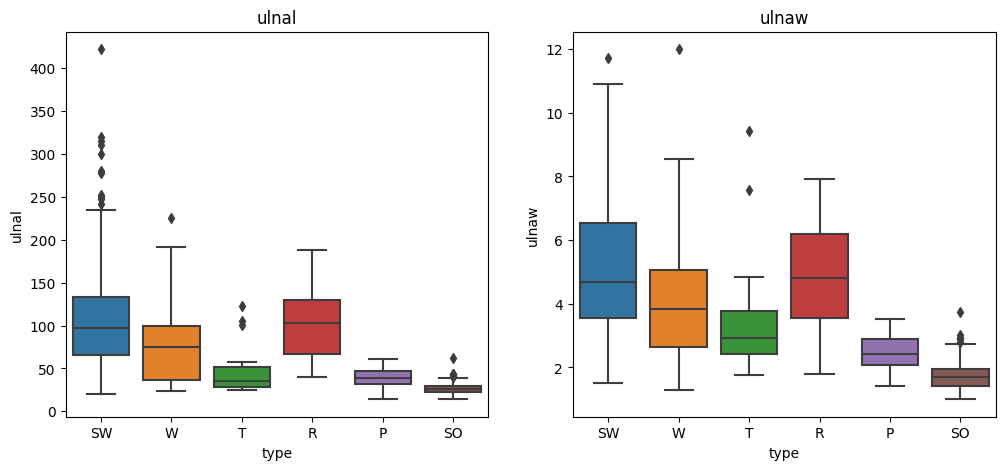

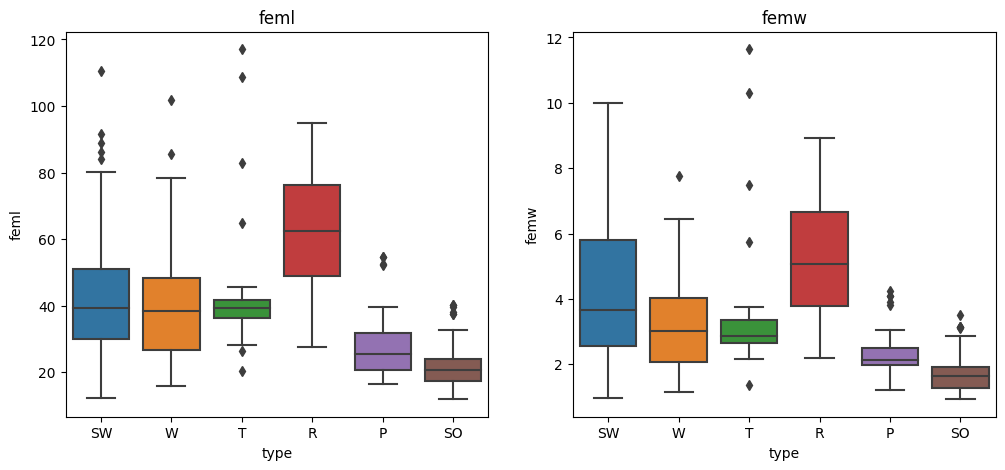

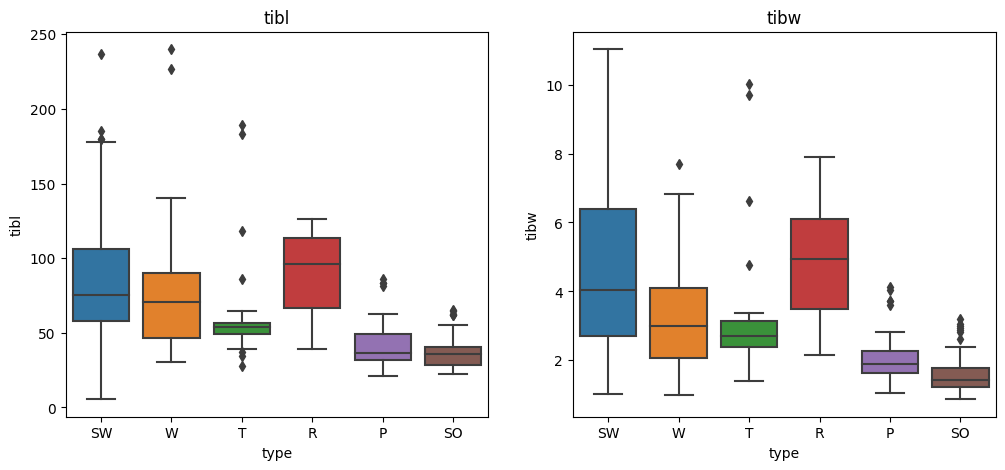

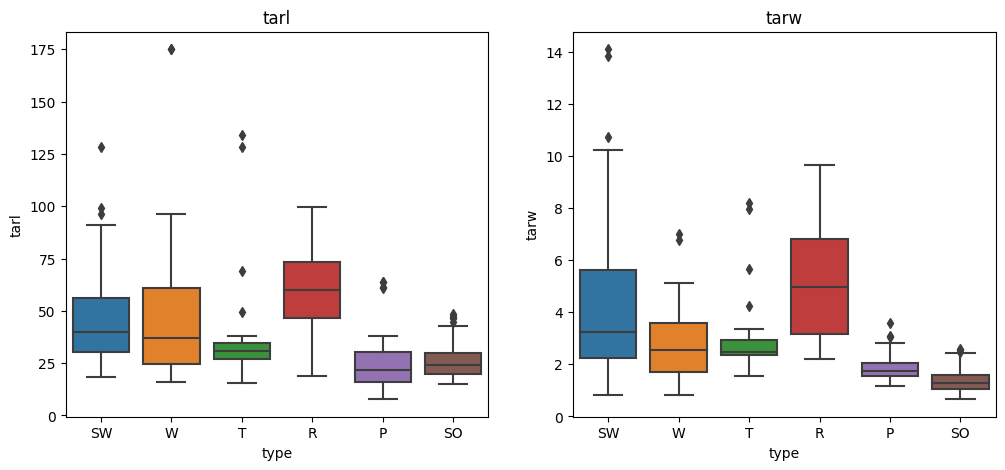

In [10]:
outlier_boxplot(birdsDataset.columns[1:3]) # function declaration
outlier_boxplot(birdsDataset.columns[3:5])
outlier_boxplot(birdsDataset.columns[5:7])
outlier_boxplot(birdsDataset.columns[7:9])
outlier_boxplot(birdsDataset.columns[9:11])

plt.show()

#### When analysing a box plot, data points outside the box plot's whiskers is referred to as an outlier. From the above subplots, "*" these data points are outliers.

---------------------------------------------------------------------------------------------------------

# Correlation 

**Data Cleaning**

In [11]:
birdsDataset.drop(['id'], axis = 1, inplace = True) 

In [12]:
birdsDataset.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


*Missing Values*

In [13]:
filteredDataSet = birdsDataset[birdsDataset.type == "R"]
filteredDataSet.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,50.000000,50.000000,49.000000,49.000000,50.00000,50.000000,50.000000,50.000000,49.000000,49.000000
mean,86.934400,6.065600,100.342449,4.813265,62.02000,5.266800,89.877400,4.949200,59.166327,5.073878
std,31.715294,2.170025,37.809684,1.649742,18.07129,1.859652,26.489156,1.701189,19.094756,2.021799
min,33.120000,2.400000,39.850000,1.800000,27.46000,2.190000,38.990000,2.150000,19.100000,2.220000
25%,57.500000,4.395000,67.150000,3.540000,48.84000,3.782500,66.585000,3.477500,46.810000,3.150000
50%,89.880000,6.125000,102.650000,4.800000,62.31500,5.060000,96.360000,4.935000,60.190000,4.950000
75%,115.025000,7.550000,129.390000,6.190000,76.15500,6.670000,113.207500,6.115000,73.290000,6.800000
max,145.000000,10.370000,188.000000,7.920000,94.79000,8.920000,126.540000,7.900000,99.720000,9.640000


In [14]:
def imputation(cols):
   
    type = cols[1]
    
    if pd.isnull(cols[0]):
        if type == "SW":
            return 110.25
        elif type == "SO":
            return 22.36
        elif type == "W":
            return 73.13
        elif type == "T":
            return 45.69
        elif type == "P":
            return 34.42
        else:
            return 86.93
    else:
        return cols[0]

In [15]:
columns = ['huml', 'humw', 'ulnal', 'ulnaw','feml','femw','tibl','tibw','tarl','tarw','type']

In [16]:
for x in columns:
    birdsDataset[x] = birdsDataset[[x, 'type']].apply(imputation, axis =1)

In [17]:
birdsDataset.isnull().sum()

huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64

*Removing Outliers one by one of each feature*

In [18]:
birdsDataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
huml,420.0,64.549810,53.809851,9.85,25.0350,44.075,90.2200,420.00
humw,420.0,4.413405,2.983272,1.14,2.1900,3.510,5.8200,22.36
ulnal,420.0,68.935143,58.669133,14.09,28.0050,43.505,97.2050,422.00
ulnaw,420.0,3.840333,4.702512,1.00,1.8700,2.965,4.7800,86.93
feml,420.0,36.924190,20.022384,11.83,21.3325,31.130,47.2250,117.07
femw,420.0,3.387333,3.965035,0.93,1.7175,2.525,4.1725,73.13
tibl,420.0,64.461381,37.860169,5.50,36.2850,51.940,82.8700,240.00
tibw,420.0,3.228000,2.279294,0.87,1.5675,2.495,4.2600,22.36
tarl,420.0,39.343548,23.273309,7.77,23.0425,31.810,50.4625,175.00
tarw,420.0,3.130024,4.643894,0.66,1.4275,2.235,3.5225,86.93


In [19]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [20]:
filteredDataTarw = remove_outlier(birdsDataset, "tarw")
filteredDataTarw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
huml,381.0,55.039239,40.267887,9.85,23.90,37.69,80.97,250.00
humw,381.0,3.828609,2.316572,1.14,2.12,3.29,5.04,22.36
ulnal,381.0,58.452205,42.966997,14.09,27.24,39.20,83.31,280.00
ulnaw,381.0,3.444226,4.734203,1.00,1.82,2.69,4.16,86.93
feml,381.0,32.946929,15.463037,11.83,20.87,28.62,40.47,82.94
femw,381.0,2.975486,3.907592,0.93,1.66,2.28,3.45,73.13
tibl,381.0,58.382257,31.275431,5.50,35.52,49.66,75.03,185.00
tibw,381.0,2.828740,1.930540,0.87,1.51,2.30,3.69,22.36
tarl,381.0,36.243123,18.661526,7.77,22.86,30.73,44.31,99.72
tarw,381.0,2.392940,1.336257,0.66,1.36,2.03,3.04,6.64


In [21]:
filteredDataTarl = remove_outlier(filteredDataTarw, "tarl")
filteredDataTarl.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
huml,365.0,51.749781,36.724793,9.85,23.52,35.63,74.89,188.00
humw,365.0,3.658329,2.175172,1.14,2.09,3.15,4.76,22.36
ulnal,365.0,55.042932,39.926592,14.09,26.87,38.30,74.39,280.00
ulnaw,365.0,3.327534,4.790862,1.00,1.80,2.59,4.04,86.93
feml,365.0,31.442438,13.786394,11.83,20.67,28.32,39.58,82.94
femw,365.0,2.840685,3.930553,0.93,1.64,2.24,3.24,73.13
tibl,365.0,55.189233,27.406923,5.50,35.22,48.92,70.28,166.00
tibw,365.0,2.680521,1.806842,0.87,1.47,2.18,3.44,22.36
tarl,365.0,34.070877,15.780038,7.77,22.12,30.02,40.27,75.65
tarw,365.0,2.269041,1.204820,0.66,1.32,1.99,2.89,6.64


In [22]:
filteredDataTibw = remove_outlier(filteredDataTarl, "tibw")
filteredDataTibw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
huml,351.0,49.204046,34.560149,9.85,23.270,34.24,70.025,188.00
humw,351.0,3.560256,2.132378,1.14,2.065,2.99,4.645,22.36
ulnal,351.0,53.128063,39.188341,14.09,26.595,36.88,69.160,280.00
ulnaw,351.0,3.252080,4.862855,1.00,1.780,2.50,3.905,86.93
feml,351.0,30.941168,13.551873,11.83,20.635,27.74,38.665,73.13
femw,351.0,2.741396,3.967207,0.93,1.620,2.20,3.145,73.13
tibl,351.0,52.289886,22.611206,5.50,34.895,47.98,68.160,125.00
tibw,351.0,2.458291,1.218293,0.87,1.440,2.10,3.210,6.10
tarl,351.0,32.872877,14.599764,7.77,21.970,29.16,38.820,75.64
tarw,351.0,2.209573,1.164997,0.66,1.300,1.95,2.820,6.64


In [23]:
filteredDataTibl = remove_outlier(filteredDataTibw, "tibl")
filteredDataTibl.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
huml,350.0,48.950086,34.280074,9.85,23.2700,34.205,69.8500,188.00
humw,350.0,3.547343,2.121642,1.14,2.0625,2.985,4.6400,22.36
ulnal,350.0,52.835600,38.858947,14.09,26.5625,36.805,69.0600,280.00
ulnaw,350.0,3.240143,4.864664,1.00,1.7800,2.495,3.8900,86.93
feml,350.0,30.849171,13.461067,11.83,20.6225,27.725,38.5700,73.13
femw,350.0,2.733657,3.970232,0.93,1.6200,2.195,3.1375,73.13
tibl,350.0,52.082143,22.305604,5.50,34.8325,47.945,67.9425,116.09
tibw,350.0,2.452000,1.214315,0.87,1.4350,2.100,3.2050,6.10
tarl,350.0,32.752029,14.443788,7.77,21.9600,29.115,38.6025,75.64
tarw,350.0,2.204143,1.162209,0.66,1.2950,1.950,2.8200,6.64


In [24]:
filteredDataFemw = remove_outlier(filteredDataTibl, "femw")
filteredDataFemw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
huml,337.0,46.113442,30.153270,9.85,22.84,33.37,67.37,154.30
humw,337.0,3.368546,1.886299,1.14,2.02,2.87,4.34,22.36
ulnal,337.0,49.002196,30.901415,14.09,26.27,35.37,66.26,157.00
ulnaw,337.0,3.109021,4.896704,1.00,1.77,2.41,3.72,86.93
feml,337.0,29.694362,12.201944,11.83,20.43,26.52,38.12,70.72
femw,337.0,2.398635,1.022827,0.93,1.59,2.17,3.05,5.27
tibl,337.0,50.942196,21.752889,5.50,34.60,46.36,64.68,116.09
tibw,337.0,2.359110,1.126132,0.87,1.42,2.06,3.00,6.10
tarl,337.0,32.303027,13.906387,7.77,22.09,29.01,37.98,75.64
tarw,337.0,2.090237,0.994516,0.66,1.27,1.90,2.69,5.63


In [25]:
filteredDataFeml = remove_outlier(filteredDataFemw, "feml")
filteredDataFeml.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
huml,335.0,45.833731,30.014368,9.85,22.735,33.20,66.385,154.30
humw,335.0,3.353970,1.882425,1.14,2.015,2.83,4.320,22.36
ulnal,335.0,48.691284,30.725991,14.09,26.270,35.33,66.135,157.00
ulnaw,335.0,3.100388,4.910046,1.00,1.765,2.38,3.675,86.93
feml,335.0,29.460597,11.854223,11.83,20.425,26.36,37.815,62.20
femw,335.0,2.388507,1.014182,0.93,1.590,2.17,3.030,5.27
tibl,335.0,50.764716,21.681968,5.50,34.525,46.24,64.515,116.09
tibw,335.0,2.349194,1.119808,0.87,1.420,2.06,2.990,6.10
tarl,335.0,32.149881,13.737140,7.77,22.040,28.98,37.855,73.95
tarw,335.0,2.080149,0.986986,0.66,1.270,1.89,2.670,5.63


In [26]:
filteredDataUlnaw = remove_outlier(filteredDataFeml, "ulnaw")
filteredDataUlnaw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
huml,331.0,45.493505,29.682304,9.85,22.735,33.12,65.685,154.30
humw,331.0,3.275076,1.555483,1.14,2.005,2.81,4.270,8.15
ulnal,331.0,48.230574,30.167533,14.09,26.270,35.24,65.615,154.66
ulnaw,331.0,2.751118,1.256783,1.00,1.760,2.38,3.620,6.40
feml,331.0,29.228852,11.663100,11.83,20.390,26.14,37.565,60.84
femw,331.0,2.369607,0.998911,0.93,1.590,2.15,3.020,5.27
tibl,331.0,50.370876,21.375032,5.50,34.360,46.02,64.005,113.44
tibw,331.0,2.327644,1.102276,0.87,1.420,2.04,2.965,6.10
tarl,331.0,31.812991,13.395042,7.77,21.970,28.62,37.355,73.95
tarw,331.0,2.065891,0.981463,0.66,1.270,1.88,2.650,5.63


In [27]:
filteredDataUlnal = remove_outlier(filteredDataUlnaw, "ulnal")
filteredDataUlnal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
huml,323.0,43.409628,26.808796,9.85,22.470,32.34,62.645,109.70
humw,323.0,3.187245,1.467593,1.14,2.000,2.73,4.070,8.15
ulnal,323.0,45.972446,26.819810,14.09,26.125,34.80,61.980,120.99
ulnaw,323.0,2.675882,1.173167,1.00,1.750,2.36,3.485,6.25
feml,323.0,28.665356,11.197489,11.83,20.355,25.65,37.020,60.84
femw,323.0,2.315789,0.945875,0.93,1.570,2.13,2.940,4.98
tibl,323.0,49.146780,20.045931,5.50,34.210,45.23,62.490,105.34
tibw,323.0,2.261053,1.024580,0.87,1.420,2.01,2.875,5.33
tarl,323.0,31.105077,12.719197,7.77,21.905,28.10,36.895,73.95
tarw,323.0,2.024551,0.951571,0.66,1.260,1.83,2.535,5.63


In [28]:
filteredDataHumw = remove_outlier(filteredDataUlnal, "humw")
filteredDataHumw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
huml,321.0,43.140903,26.673737,9.85,22.39,32.31,61.92,109.70
humw,321.0,3.157103,1.421270,1.14,2.00,2.70,4.04,7.10
ulnal,321.0,45.853427,26.860380,14.09,26.11,34.69,61.54,120.99
ulnaw,321.0,2.655078,1.146498,1.00,1.75,2.35,3.47,5.83
feml,321.0,28.553240,11.141406,11.83,20.35,25.24,36.98,60.84
femw,321.0,2.306231,0.940993,0.93,1.57,2.11,2.93,4.98
tibl,321.0,48.936199,19.929045,5.50,34.16,44.69,62.09,105.34
tibw,321.0,2.249128,1.016402,0.87,1.42,2.00,2.85,5.33
tarl,321.0,31.068723,12.750476,7.77,21.90,28.05,36.60,73.95
tarw,321.0,2.015140,0.946687,0.66,1.26,1.81,2.52,5.63


In [29]:
filteredDataWithoutOutliers = remove_outlier(filteredDataHumw, "huml")
filteredDataWithoutOutliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
huml,321.0,43.140903,26.673737,9.85,22.39,32.31,61.92,109.70
humw,321.0,3.157103,1.421270,1.14,2.00,2.70,4.04,7.10
ulnal,321.0,45.853427,26.860380,14.09,26.11,34.69,61.54,120.99
ulnaw,321.0,2.655078,1.146498,1.00,1.75,2.35,3.47,5.83
feml,321.0,28.553240,11.141406,11.83,20.35,25.24,36.98,60.84
femw,321.0,2.306231,0.940993,0.93,1.57,2.11,2.93,4.98
tibl,321.0,48.936199,19.929045,5.50,34.16,44.69,62.09,105.34
tibw,321.0,2.249128,1.016402,0.87,1.42,2.00,2.85,5.33
tarl,321.0,31.068723,12.750476,7.77,21.90,28.05,36.60,73.95
tarw,321.0,2.015140,0.946687,0.66,1.26,1.81,2.52,5.63


In [30]:
filteredDataWithoutOutliers.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [31]:
filteredDataWithoutOutliers.shape

(321, 11)

In [32]:
filteredDataWithoutOutliers.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW



profile = ProfileReport(filteredDataWithoutOutliers, title="Report after data pre-processing")
profile

# Splitting the data

In [33]:
X = filteredDataWithoutOutliers.drop(['type'], axis=1)

# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

In [34]:
enc=LabelEncoder()
y=enc.fit_transform(filteredDataWithoutOutliers['type'])

In [35]:
X

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13
...,...,...,...,...,...,...,...,...,...,...
415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15
416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15
417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21
418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24


In [36]:
y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [37]:
len(y)

321

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [39]:
X_train

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
277,41.36,3.52,49.34,2.83,30.97,2.46,44.31,2.43,29.97,2.05
62,30.11,2.54,28.72,2.34,20.66,2.17,57.89,2.38,34.75,2.52
69,41.21,2.50,43.10,2.43,18.20,1.44,44.69,1.58,30.82,1.36
273,47.17,3.96,56.57,2.87,33.60,2.68,50.66,2.49,32.03,2.06
177,32.31,2.16,32.74,1.98,19.05,1.40,33.37,1.14,21.20,1.00
...,...,...,...,...,...,...,...,...,...,...
285,30.51,2.69,35.33,2.29,21.90,2.04,32.26,1.65,22.52,1.43
124,48.19,3.44,43.71,3.01,50.46,3.60,94.86,3.45,55.00,4.57
172,64.75,4.27,70.13,3.91,41.82,3.23,86.50,3.81,65.24,3.41
368,15.24,1.40,18.37,1.13,13.75,1.05,25.57,0.91,19.10,0.86


In [40]:
y_train

array([0, 3, 3, 0, 5, 5, 5, 1, 2, 2, 5, 2, 2, 2, 3, 2, 0, 1, 2, 2, 1, 3,
       0, 3, 2, 3, 3, 2, 2, 3, 0, 1, 2, 5, 1, 3, 2, 2, 0, 1, 1, 5, 3, 2,
       3, 0, 1, 3, 2, 5, 5, 4, 0, 5, 5, 3, 5, 3, 0, 5, 5, 2, 5, 3, 3, 2,
       3, 2, 2, 4, 2, 5, 2, 1, 2, 2, 2, 1, 2, 1, 2, 4, 3, 2, 0, 0, 5, 2,
       4, 2, 2, 2, 0, 2, 1, 2, 3, 4, 0, 2, 4, 2, 2, 4, 5, 3, 5, 2, 5, 0,
       0, 1, 2, 2, 2, 3, 2, 5, 2, 0, 3, 3, 3, 0, 1, 2, 4, 0, 3, 5, 2, 0,
       2, 3, 5, 2, 1, 3, 2, 1, 2, 3, 2, 2, 2, 5, 0, 2, 2, 5, 0, 5, 3, 2,
       3, 1, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 4, 3, 2, 0, 2, 2, 1, 3, 2, 1,
       2, 4, 2, 3, 5, 2, 3, 3, 3, 1, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 3, 2, 0, 2, 5, 3, 3, 3, 5, 2, 3, 2, 5, 3, 2, 2, 3, 5, 2,
       0, 2, 1, 2, 2, 3, 3, 0, 0, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2, 0, 2, 2,
       1, 4, 1, 5, 5, 2, 4, 2, 3, 0, 5, 5, 2, 5])

In [41]:
print('x_tr.shape=', X_train.shape)
print('y_tr.shape=', y_train.shape)
print('')

x_tr.shape= (256, 10)
y_tr.shape= (256,)



In [42]:


# over = RandomOverSampler(sampling_strategy='auto')
# under = RandomUnderSampler(sampling_strategy='auto')
# pipeline = Pipeline(steps=[('o', over), ('u', under)])
ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
X_resampled

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
0,41.36,3.52,49.34,2.83,30.97,2.46,44.31,2.43,29.97,2.05
1,30.11,2.54,28.72,2.34,20.66,2.17,57.89,2.38,34.75,2.52
2,41.21,2.50,43.10,2.43,18.20,1.44,44.69,1.58,30.82,1.36
3,47.17,3.96,56.57,2.87,33.60,2.68,50.66,2.49,32.03,2.06
4,32.31,2.16,32.74,1.98,19.05,1.40,33.37,1.14,21.20,1.00
...,...,...,...,...,...,...,...,...,...,...
589,87.91,5.15,97.67,4.78,38.57,2.92,70.10,2.59,34.21,2.33
590,85.00,5.07,93.17,4.21,38.33,2.57,67.32,2.73,40.00,2.53
591,87.01,5.18,94.34,4.45,35.73,2.80,67.12,2.93,43.43,2.34
592,30.99,2.09,26.14,1.82,32.83,2.09,50.67,1.98,30.80,1.95


In [43]:
len(y_resampled)

594

In [44]:


lr=LogisticRegression()
lr.fit(X_resampled,y_resampled)
print('LogistReG accuracy:', accuracy_score(y_test, lr.predict(X_test) ))
print('LogistReg f1-score:', f1_score(y_test,lr.predict(X_test), average='macro'))

svc=SVC()
svc.fit(X_resampled,y_resampled)
print('SupportVector Classifier accuracy:', accuracy_score(y_test, svc.predict(X_test) ))
print('SupportVector Classifier f1-score:', f1_score(y_test,svc.predict(X_test), average='macro'))

rf=RandomForestClassifier(1000, max_depth=8)
rf.fit(X_resampled,y_resampled)
print('RandForest accuracy:', accuracy_score(y_test,rf.predict(X_test)))
print('RandForest f1-score:', f1_score(y_test,rf.predict(X_test), average='macro'))

LogistReG accuracy: 0.8615384615384616
LogistReg f1-score: 0.7703367710720652
SupportVector Classifier accuracy: 0.7692307692307693
SupportVector Classifier f1-score: 0.6367013786554017


/home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandForest accuracy: 0.7846153846153846
RandForest f1-score: 0.6484039371716857


# Ada Booster

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

tree_ada=DecisionTreeClassifier(criterion='entropy',random_state=1, max_depth=5)
ada=AdaBoostClassifier(base_estimator=tree_ada,n_estimators=1000,learning_rate=0.1, random_state=5)
ada.fit(X_resampled,y_resampled)
y_pred=ada.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred, average='macro')
recall=recall_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
# results=results.append(pd.DataFrame([['Ada Boost', 'criterion=entropy, max_depth=5', accuracy,precision,recall,f1]],
#                                     columns=list(results.columns)))
sns.heatmap(confusion_matrix(y_test,y_pred),xticklabels= enc.classes_,
            yticklabels=enc.classes_, annot=True,fmt='d');
plt.ylabel('true')
plt.xlabel('predicted');
# results.iloc[-1:]
print('Ada accuracy:', accuracy_score(y_test,y_pred))
print('Ada f1-score:', f1_score(y_test,y_pred, average='macro'))
print(classification_report(y_test,y_pred))

/home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Ada accuracy: 0.7230769230769231
Ada f1-score: 0.5315127401334298
              precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.00      0.00      0.00         1
           2       0.87      1.00      0.93        27
           3       0.83      0.71      0.77        14
           4       0.80      0.67      0.73         6
           5       0.33      0.27      0.30        11

    accuracy                           0.72        65
   macro avg       0.54      0.53      0.53        65
weighted avg       0.71      0.72      0.71        65



# Gradient Boosted Tree (Imbalance Data)


In [46]:
from sklearn.ensemble import GradientBoostingClassifier


gb=GradientBoostingClassifier(random_state=5, n_estimators=1000, max_depth=4)
gb.fit(X_resampled,y_resampled)
y_pred=gb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred, average='macro')
recall=recall_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')
# results=results.append(pd.DataFrame([['Gradient Boosted Classifier', 'n_estimators=1000, max_depth=4',
#                                       accuracy,precision,recall,f1]],
#                                     columns=list(results.columns)))
sns.heatmap(confusion_matrix(y_test,y_pred),xticklabels= enc.classes_,
            yticklabels=enc.classes_, annot=True,fmt='d');
plt.ylabel('true')
plt.xlabel('predicted');
# results.iloc[-1:]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       0.00      0.00      0.00         1
           2       0.87      1.00      0.93        27
           3       0.86      0.86      0.86        14
           4       1.00      0.33      0.50         6
           5       0.75      0.55      0.63        11

    accuracy                           0.80        65
   macro avg       0.67      0.59      0.60        65
weighted avg       0.82      0.80      0.79        65



# Classification Report for Logistic Regression 

In [47]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.83      0.62         6
           1       0.33      1.00      0.50         1
           2       1.00      0.89      0.94        27
           3       0.93      0.93      0.93        14
           4       0.80      0.67      0.73         6
           5       1.00      0.82      0.90        11

    accuracy                           0.86        65
   macro avg       0.76      0.86      0.77        65
weighted avg       0.91      0.86      0.88        65



# Classification Report for Random Forest

In [48]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.83      0.62         6
           1       0.25      1.00      0.40         1
           2       0.87      1.00      0.93        27
           3       0.92      0.79      0.85        14
           4       1.00      0.33      0.50         6
           5       0.83      0.45      0.59        11

    accuracy                           0.78        65
   macro avg       0.73      0.73      0.65        65
weighted avg       0.84      0.78      0.78        65



# Classification Report for Support Vector Classifier

In [49]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.25      1.00      0.40         1
           2       0.87      1.00      0.93        27
           3       0.85      0.79      0.81        14
           4       0.83      0.83      0.83         6
           5       1.00      0.18      0.31        11

    accuracy                           0.77        65
   macro avg       0.71      0.74      0.64        65
weighted avg       0.84      0.77      0.75        65



# Evaluation metrics

# Confusion Matrix Logistic Regression

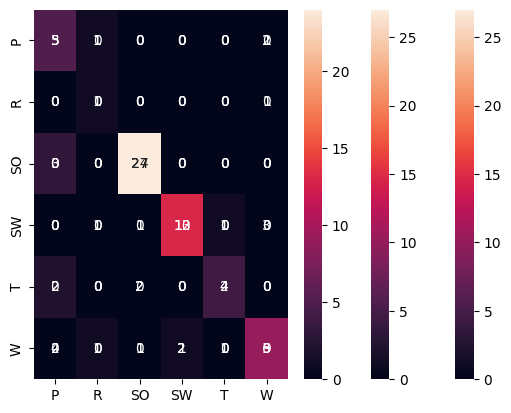

In [50]:
sns.heatmap(confusion_matrix(y_test,lr.predict(X_test)),xticklabels= enc.classes_,
            yticklabels=enc.classes_, annot=True,fmt='d')
plt.show()

# Confusion Matrix Random Forest

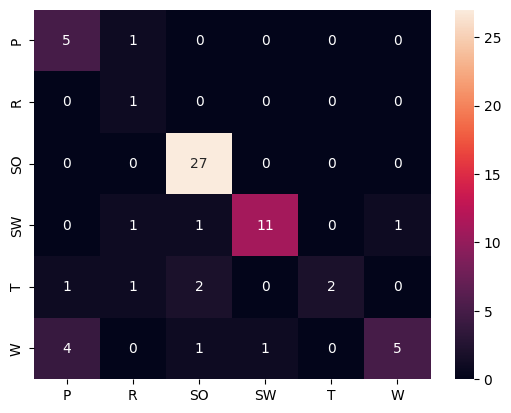

In [51]:
sns.heatmap(confusion_matrix(y_test,rf.predict(X_test)),xticklabels= enc.classes_,
            yticklabels=enc.classes_, annot=True,fmt='d')
plt.show()

# Confusion Matrix for Support Vector Classifier

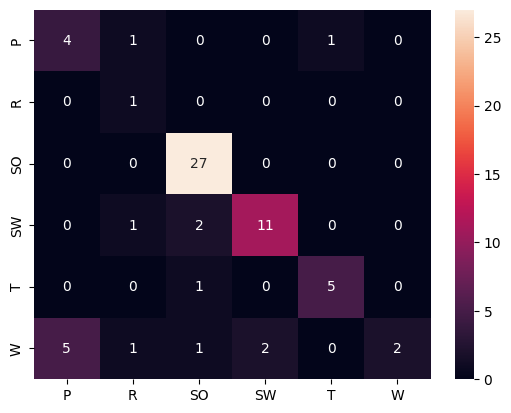

In [52]:
sns.heatmap(confusion_matrix(y_test,svc.predict(X_test)),xticklabels= enc.classes_,
            yticklabels=enc.classes_, annot=True,fmt='d')
plt.show()

# AUC

In [59]:
from sklearn import metrics


fpr, tpr, thresholds = metrics.roc_curve(y_test, gb.predict(np.array(X_test)), pos_label=2)
auc= metrics.auc(fpr, tpr)
auc


/home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.31578947368421056

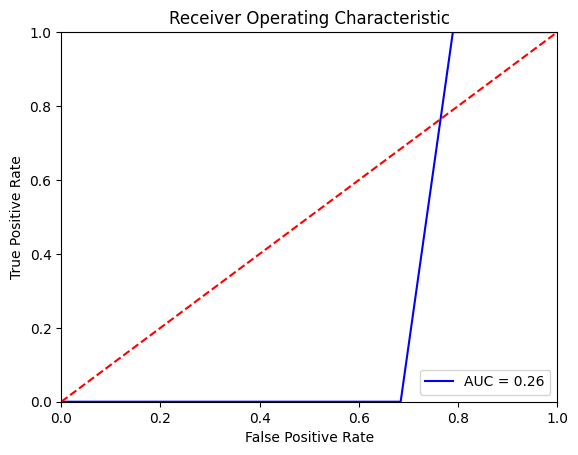

In [54]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()